# Test for more than two independent groups

So far we have utilize the Student's t-test and Mann-Whitney's U-test for comparing two independent samples.
What if would have more than two independent groups to handle? Let's study one such case.

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')

In [2]:
%pwd
%cd C:\Users\siddh\Downloads
df = pd.read_excel('sid.xlsx')
df.head()

C:\Users\siddh\Downloads


,number,gender,age,family,education,years_of_service,salary,sat management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare_work,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [3]:
df['salary'].min()

1521

In [4]:
df['salary'].max()

6278

Let's study the sat_salary with respect the salary groups. So we form the groups/categories for salary first. 


In [5]:
bins = [1500, 2500, 3500, 4500, 6500] # Just decided by myself this!
df['salary_class'] = pd.cut(df['salary'], bins = bins)
df['salary_class'] = df['salary_class'].astype(str)   # Making the column of str type instead of intervalindex which is bit difficult to handle later on
#df['salary_class'].astype(str).hist()
#type(df['salary_class'][0])

# And changing the salary_class names something that are maybe easier to handle.
df.loc[(df.salary_class == '(1500, 2500]'),'salary_class']=1
df.loc[(df.salary_class == '(2500, 3500]'),'salary_class']=2
df.loc[(df.salary_class == '(3500, 4500]'),'salary_class']=3
df.loc[(df.salary_class == '(4500, 6500]'),'salary_class']=4
df.head()


,number,gender,age,family,education,years_of_service,salary,sat management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare_work,holidayCabin,gym,muscleCare,salary_class
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,3
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,2
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,1
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,1
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,1


In [6]:
# let's now see the means for different salary classes for sat_salary

df1 = df.groupby('salary_class')['sat_tasks'].mean()
df1

salary_class
1    2.957447
2    3.423077
3    3.800000
4    3.750000
Name: sat_tasks, dtype: float64

# What methods could we use?

We have now mean values calculated for more that two independent samples. We have the option to utilize either the **variance analysis** or the so called **Kruskal-Wallis** test. Note the similarity with the situation that we had with the two independent samples. There we had the **t-test** or **Mann-Whitney U-test** as options and now we have the variance analysis or Kruskal-Wallis tests as the options. Again, you can utilize the variance analysis (**oneway F-test**) to study variables like sat_salary but similar conditions should hold also now.

* samples for categories are independent
* n>30
* data inside groups somewhat normally distributed
* The population standard deviations of the groups are all equal. This property is known as homoscedasticity.

If you have a doubt, you can use Kruskal-Wallis, but that maybe gives you a "bit less power".

### Checking the conditions for salary_class and salary, trying variance analysis first

Histogram can already show much whether the distribution is something like normal or not

salary_class
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
Name: sat_tasks, dtype: object

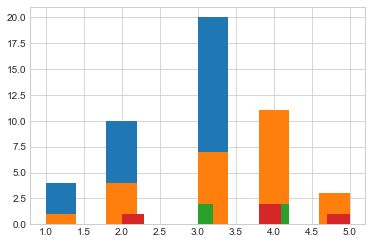

In [7]:
# This is maybe not the nicest looking histogram but will do for the time being
df.groupby('salary_class')['sat_tasks'].hist()

You can see that the amount of data for class 3 and 4 is rather small. And we can not see any shape of normal distribution for those classes. So already in that respect, it would be adviced to utilize something else but the variance analysis. But let's check the standard deviations still for illustrating the situation.

In [8]:
df.groupby('salary_class')['sat_tasks'].std()

salary_class
1    1.020602
2    1.026570
3    0.836660
4    1.258306
Name: sat_tasks, dtype: float64

Here, it seems that the standard deviations are rather close to each other. So based on that criteria it would be maybe ok to use variance analysis

In [9]:
# Let's form the groups to be compared first
s1 = df['sat_tasks'][df['salary_class'] == 1] # (1500, 2500]
s2 = df['sat_tasks'][df['salary_class'] == 2] # (2500, 3500]
s3 = df['sat_tasks'][df['salary_class'] == 3] # (3500, 4500]
s4 = df['sat_tasks'][df['salary_class'] == 4] # (4500, 6500]

# F-testi
from scipy.stats import f_oneway
f_oneway(s1, s2, s3, s4)

F_onewayResult(statistic=2.245931814194604, pvalue=0.08952666173514838)

The p-value is not less than 0.05. Hence, we would not conclude that there is a clear difference between groups with their satisfaction levels to their salaries. But, we could use the the Kruskal-Wallis test also, so let's do that next.

### Using Kruskal-Wallis instead

We already have the variables s1, s2, s3 and s4, so let's use them.

In [10]:
from scipy.stats import kruskal
kruskal(s1, s2, s3, s4)

KruskalResult(statistic=6.815190510949633, pvalue=0.07802747009930029)

Here also, the p-value is greater than 0.05 and we can not conclude that there is a clear difference in satisfaction leves to salaries between salary groups.

I is maybe good to note that although it seemed earlier in the file that there might be difference between those salary class to satisfaction to salary, now based on the test there is no statistical evidence for that. One thing might be, that for example for the highest salary class there were just two samples and that is taken into account in the test. Although the mean for that salary class was 3 it is difficult to draw any conclusions on that because there was not much data.
